In [2]:
import sympy
from sympy import sin
from sympy.utilities import lambdify
import numpy as np
import matplotlib.pyplot as plt
import vector_fields 
import ipywidgets as widgets

In [18]:
%%html
<style> .MathJax { font-size: 0.6em;} </style>

# Das mathematische Pendel

In [3]:
from importlib import reload 

In [4]:
vector_fields = reload(vector_fields)

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
(t,x,y) = sympy.var("t x y")

Das mathematische Pendel lässt sich durch die Differentialgleichung zweiter Ordnung

\begin{align*}\ddot x = -k\sin(x)\end{align*}

beschreiben. Lösungen sind Funktionen der Form $I \to \mathbb{R}$ für ein Intervall $I$. 
Dabei ist der Parameter $k = \frac{g}{\ell}$ und wird im Folgenden in vielen Abbildungen auf $1$ gesetzt.

In [7]:
k = 1
f = sympy.Matrix([y,-k*sin(x)])

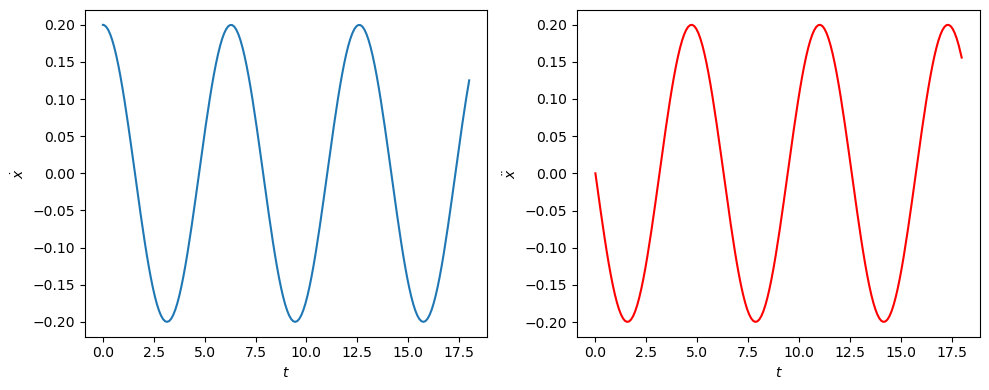

In [8]:
fig = vector_fields.plot_solution_pair(f,(x,y));
fig.set_figwidth(10)
fig.set_figheight(4)
fig.axes[0].set_xlabel("$t$")
fig.axes[1].set_xlabel("$t$")
fig.axes[0].set_ylabel("$\dot x$")
fig.axes[1].set_ylabel("$\ddot x$")
fig.tight_layout()
plt.show()

## Differentialgleichungssystem und Vektorfeld

Setzen wir $y=\dot x$, so erhalten wir
das 2-dimensionale Differentialgleichungssystem
\begin{align*}\dot x &= y,\\ \dot y &= -k\sin(x).\end{align*}

Die Abbildung $\mathbb{R} \mapsto \mathbb{R},\; \begin{pmatrix}x \\ y\end{pmatrix} \mapsto \begin{pmatrix} y \\ -k\sin(x)\end{pmatrix}$ definiert ein Vektorfeld.

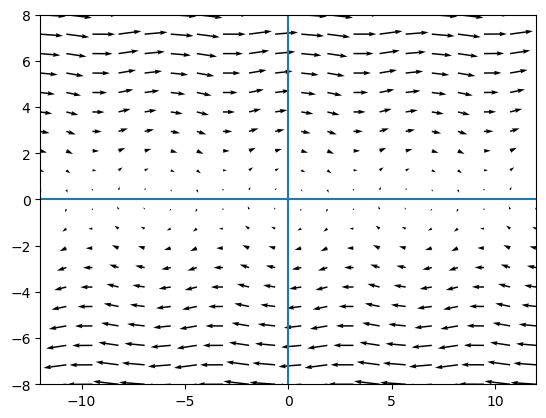

In [9]:
vector_fields.plot_vector_field(f,(x,-12,12),(y,-8,8))
plt.show()


## Einige Lösungskurven

Lösungen des obigen Differentialgleichungssystems sind Kurven im $\mathbb{R}^2$, also Abbildungen der Form $I \to \mathbb{R}^2$ für ein Intervall $I$. Die folgende Abbildung zeigt die **Bilder** einiger dieser Kurven.

In [10]:
o2 = widgets.Output()
with o2:
    ax = vector_fields.plot_streamlines(f,(x,-12,12),(y,-8,8))
    plt.show()
o1 = vector_fields.field_player(f,500,400)
widgets.HBox([o2,o1])


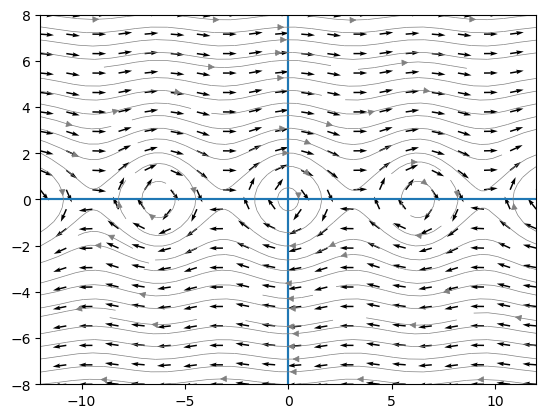

In [85]:
ax = vector_fields.plot_vector_field(f/vector_fields.norm(f),(x,-12,12),(y,-8,8),color="black")
vector_fields.plot_streamlines(f,(x,-12,12),(y,-8,8),ax=ax,color="grey",linewidth=0.5)
plt.show()

## Eine spezielle Lösung

In [98]:
initial_value = (2.2,0)
solution = vector_fields.solve_ivp(f,(x,y),(0,12),initial_value)

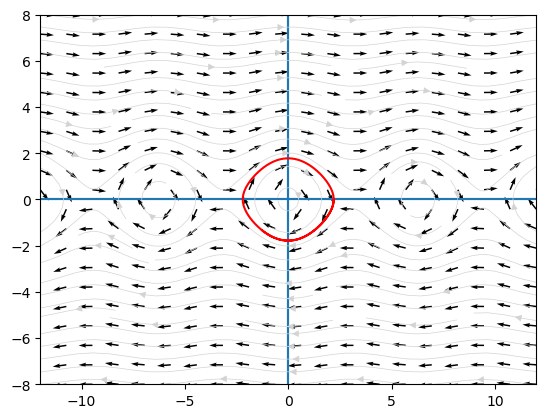

In [101]:
ax = vector_fields.plot_vector_field(f/vector_fields.norm(f),(x,-12,12),(y,-8,8),color="black")
vector_fields.plot_streamlines(f,(x,-12,12),(y,-8,8),ax=ax,color="lightgrey",linewidth=0.5)
ax.plot(solution.y[0,:],solution.y[1,:],color="red")
plt.show()